In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import geopandas as gpd
import difflib
from itertools import cycle, islice
import datetime as datetime
import glob
from matplotlib import pyplot

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

In [2]:
df= pd.read_csv('Entrenamieto_ECI_2020.csv')
df.head(5)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,"5,272,800.00",EUR,"5,272,800.00",Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,"48,230.00",EUR,"48,230.00",Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,"83,865.60",USD,"83,865.60",Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,"7,421,881.50",USD,"7,421,881.50",Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,"13,357,192.50",USD,"13,357,192.50",Closed Lost,Prod_Category_A_None


In [3]:
df['Territory'].value_counts()

None               4999
Germany            1682
NW America         1568
Australia          1208
India               809
                   ... 
Egypt                 1
Solomon Islands       1
Georgia               1
Czech Republic        1
Burma                 1
Name: Territory, Length: 76, dtype: int64

In [4]:
for x in df.columns:
    print (x + ',')

ID,
Region,
Territory,
Pricing, Delivery_Terms_Quote_Appr,
Pricing, Delivery_Terms_Approved,
Bureaucratic_Code_0_Approval,
Bureaucratic_Code_0_Approved,
Submitted_for_Approval,
Bureaucratic_Code,
Account_Created_Date,
Source ,
Billing_Country,
Account_Name,
Opportunity_Name,
Opportunity_ID,
Sales_Contract_No,
Account_Owner,
Opportunity_Owner,
Account_Type,
Opportunity_Type,
Quote_Type,
Delivery_Terms,
Opportunity_Created_Date,
Brand,
Product_Type,
Size,
Product_Category_B,
Price,
Currency,
Last_Activity,
Quote_Expiry_Date,
Last_Modified_Date,
Last_Modified_By,
Product_Family,
Product_Name,
ASP_Currency,
ASP,
ASP_(converted)_Currency,
ASP_(converted),
Planned_Delivery_Start_Date,
Planned_Delivery_End_Date,
Month,
Delivery_Quarter,
Delivery_Year,
Actual_Delivery_Date,
TRF,
Total_Amount_Currency,
Total_Amount,
Total_Taxable_Amount_Currency,
Total_Taxable_Amount,
Stage,
Prod_Category_A,


In [5]:
df.shape

(16947, 52)

In [6]:
df['Planned_Delivery_End_Date']=pd.to_datetime(df['Planned_Delivery_End_Date'])
df['Planned_Delivery_Start_Date']=pd.to_datetime(df['Planned_Delivery_Start_Date'])


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  16947 non-null  int64         
 1   Region                              16947 non-null  object        
 2   Territory                           16947 non-null  object        
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64         
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64         
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64         
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64         
 7   Submitted_for_Approval              16947 non-null  int64         
 8   Bureaucratic_Code                   16947 non-null  object        
 9   Account_Created_Date                16947 non-null  object        
 10  Source                

In [8]:
df.dtypes

ID                                             int64
Region                                        object
Territory                                     object
Pricing, Delivery_Terms_Quote_Appr             int64
Pricing, Delivery_Terms_Approved               int64
Bureaucratic_Code_0_Approval                   int64
Bureaucratic_Code_0_Approved                   int64
Submitted_for_Approval                         int64
Bureaucratic_Code                             object
Account_Created_Date                          object
Source                                        object
Billing_Country                               object
Account_Name                                  object
Opportunity_Name                              object
Opportunity_ID                                 int64
Sales_Contract_No                             object
Account_Owner                                 object
Opportunity_Owner                             object
Account_Type                                  

In [9]:
df.describe()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Opportunity_ID,ASP,ASP_(converted),Delivery_Year,TRF,Total_Amount,Total_Taxable_Amount
count,"16,947.00","16,947.00","16,947.00","16,947.00","16,947.00","16,947.00","16,947.00","13,738.00","13,738.00","16,947.00","16,947.00","16,888.00","16,947.00"
mean,"17,666.65",0.81,0.58,0.48,0.32,0.00,"5,335.94",7.01,0.43,"2,017.14",2.34,"1,993,659.22","3,224,116.79"
std,"6,940.86",0.39,0.49,0.50,0.47,0.00,"3,324.72",18.86,0.76,0.83,12.17,"18,484,259.88","20,303,604.73"
min,"4,854.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"2,016.00",0.00,0.00,0.00
25%,"11,953.00",1.00,0.00,0.00,0.00,0.00,"2,448.50",0.36,0.37,"2,016.00",0.00,"26,775.00","85,465.80"
50%,"18,114.00",1.00,1.00,0.00,0.00,0.00,"5,306.00",0.40,0.41,"2,017.00",0.00,"107,250.00","376,067.25"
75%,"23,845.50",1.00,1.00,1.00,1.00,0.00,"7,698.00",0.51,0.48,"2,018.00",1.00,"460,389.83","1,037,450.00"
max,"28,773.00",1.00,1.00,1.00,1.00,0.00,"12,803.00",80.00,67.00,"2,020.00",500.00,"1,320,000,000.00","1,356,338,620.00"


In [10]:
df['Stage'].value_counts()

Closed Won       9533
Closed Lost      7350
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

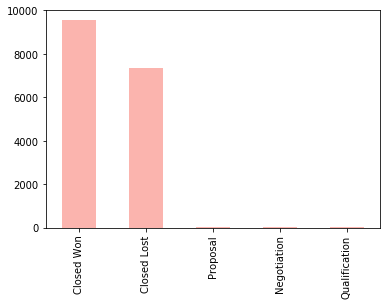

In [11]:
df['Stage'].value_counts().plot(kind='bar', colormap='Pastel1')

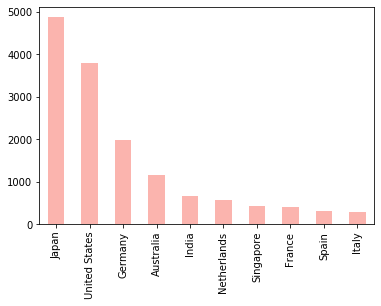

In [12]:
df['Billing_Country'].value_counts().nlargest(10).plot(kind='bar', colormap='Pastel1')

In [13]:
df['Opportunity_ID'].nunique()

9841

In [14]:
#Para convertir todos los precios de Total_Amount de diferentes monedas a dolar, no voy a usar los precios del
#mercado actual. Voy a utilizar la conversión que se usó en el dataset original en la columna ASP_(converted)
toEUR = df[df.ASP_Currency=='EUR'].head(1)[['ASP_(converted)']].iloc[0,0]/df[df.ASP_Currency=='EUR'].head(1)[['ASP']].iloc[0,0]
toAUD = df[df.ASP_Currency=='AUD'].head(1)[['ASP_(converted)']].iloc[0,0]/df[df.ASP_Currency=='AUD'].head(1)[['ASP']].iloc[0,0]
toGBP = df[df.ASP_Currency=='GBP'].head(1)[['ASP_(converted)']].iloc[0,0]/df[df.ASP_Currency=='GBP'].head(1)[['ASP']].iloc[0,0]
toJPY = df[['ASP_(converted)']].iloc[12,0]/df[['ASP']].iloc[12,0]
#En el head(1) de JPY justo habia un nan. Ese numero magico 12 corresponde a la primera fila de moneda JPY con un valor valido

In [15]:
#Ahora si hago la conversion
df['Total_Amount_(converted)']=0.0
df['Total_Amount_(converted)'].loc[df['Total_Amount_Currency']=='EUR'] = df['Total_Amount'].apply(lambda x: x*toEUR)
df['Total_Amount_(converted)'].loc[df['Total_Amount_Currency']=='JPY'] = df['Total_Amount'].apply(lambda x: x*toJPY)
df['Total_Amount_(converted)'].loc[df['Total_Amount_Currency']=='AUD'] = df['Total_Amount'].apply(lambda x: x*toAUD)
df['Total_Amount_(converted)'].loc[df['Total_Amount_Currency']=='GBP'] = df['Total_Amount'].apply(lambda x: x*toGBP)
df['Total_Amount_(converted)'].loc[df['Total_Amount_Currency']=='USD'] = df['Total_Amount'].apply(lambda x: x)

df['Total_Taxable_Amount_(converted)']=0.0
df['Total_Taxable_Amount_(converted)'].loc[df['Total_Taxable_Amount_Currency']=='EUR'] = df['Total_Taxable_Amount'].apply(lambda x: x*toEUR)
df['Total_Taxable_Amount_(converted)'].loc[df['Total_Taxable_Amount_Currency']=='JPY'] = df['Total_Taxable_Amount'].apply(lambda x: x*toJPY)
df['Total_Taxable_Amount_(converted)'].loc[df['Total_Taxable_Amount_Currency']=='AUD'] = df['Total_Taxable_Amount'].apply(lambda x: x*toAUD)
df['Total_Taxable_Amount_(converted)'].loc[df['Total_Taxable_Amount_Currency']=='GBP'] = df['Total_Taxable_Amount'].apply(lambda x: x*toGBP)
df['Total_Taxable_Amount_(converted)'].loc[df['Total_Taxable_Amount_Currency']=='USD'] = df['Total_Taxable_Amount'].apply(lambda x: x)


C:\Users\Laptop\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [36]:
#Duracion de las oportunidades
df_duracion = df[['Opportunity_ID','Opportunity_Name','Planned_Delivery_Start_Date','Planned_Delivery_End_Date','Delivery_Quarter','Total_Amount','Total_Amount_(converted)','Territory','Stage']]
df_duracion.loc[df_duracion['Opportunity_ID'] == 12801]


,Opportunity_ID,Opportunity_Name,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Delivery_Quarter,Total_Amount,Total_Amount_(converted),Territory,Stage
16942,12801,Opportunity_Name_9245,2016-03-21,2016-03-25,Q1,"103,350.00","116,898.79",Austria,Closed Won
16943,12801,Opportunity_Name_9245,2016-04-04,2016-04-08,Q2,"93,015.00","105,208.91",Austria,Closed Won
16944,12801,Opportunity_Name_9245,2016-03-28,2016-03-31,Q1,"103,350.00","116,898.79",Austria,Closed Won


In [38]:
#para la misma id_opportunity se ven diferentes fechas de comienzo y fin, 
#agrupo por id y me quedo con la fecha de comienzo mas chica y de fin mas grande como para calcular de la oportundad entera...
df_duracion_grouped = df_duracion.groupby('Opportunity_ID')\
    .agg({'Planned_Delivery_Start_Date':'min', 'Planned_Delivery_End_Date': 'max','Total_Amount':'sum','Total_Amount_(converted)':'sum', 'Territory':'first'})\
    .reset_index()
df_duracion_grouped.head(3)

,Opportunity_ID,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Total_Amount,Total_Amount_(converted),Territory
0,0,2016-05-01,2016-06-30,"5,272,800.00","5,964,043.80",None
1,1,2016-01-18,2016-01-20,"48,230.00","54,552.77",None
2,2,2016-01-25,2016-01-25,"83,865.60","83,865.60",NW America


In [39]:
#calculo la duracion del proyecto en dias
df_duracion_grouped['Opportunity_duration'] = df_duracion_grouped['Planned_Delivery_End_Date'] - df_duracion_grouped['Planned_Delivery_Start_Date']
#agrego la duracion en meses y redondeo hacia arriba
df_duracion_grouped['Opportunity_duration_months'] = ((df_duracion_grouped['Planned_Delivery_End_Date'] - df_duracion_grouped['Planned_Delivery_Start_Date'])/np.timedelta64(1, 'M'))
df_duracion_grouped['Opportunity_duration_months'] = np.ceil(df_duracion_grouped['Opportunity_duration_months'])
#los diez proyectos de ventas mas largos
df_duracion_grouped.nlargest(10,'Opportunity_duration')

,Opportunity_ID,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Total_Amount,Total_Amount_(converted),Territory,Opportunity_duration,Opportunity_duration_months
8914,9773,2018-10-14,2208-12-31,"290,713.50","328,824.92",Netherlands,69474 days,"2,283.00"
4114,4283,2017-08-01,2020-08-07,"1,887,900.00","1,887,900.00",NW America,1102 days,37.00
3936,4096,2017-07-10,2019-07-10,"5,702,850.00","5,702,850.00",NE America,730 days,24.00
4835,5026,2019-01-07,2020-06-30,"35,105,000.00","39,707,130.48",Kazakhstan,540 days,18.00
3721,3869,2016-12-01,2018-04-30,"16,983,000.00","16,983,000.00",Vietnam,515 days,17.00
5062,5263,2018-02-05,2019-06-28,"9,808,074.00","9,808,074.00",NE America,508 days,17.00
1833,1919,2017-04-01,2018-06-30,"9,151,720.20","9,151,720.20",NW America,455 days,15.00
2434,2536,2017-01-02,2018-03-30,"16,314,480.00","16,314,480.00",NE America,452 days,15.00
1042,1112,2016-03-07,2017-05-01,"4,893,277.50","4,893,277.50",NE America,420 days,14.00
2448,2551,2016-11-08,2017-12-28,"759,000.00","858,501.98",Netherlands,415 days,14.00


In [40]:
#se ve que la fecha de esta oportunidad no tiene sentido... elimino este registro
indexNames = df_duracion_grouped[df_duracion_grouped['Opportunity_ID'] == 9773].index
df_duracion_grouped.drop(indexNames , inplace=True)

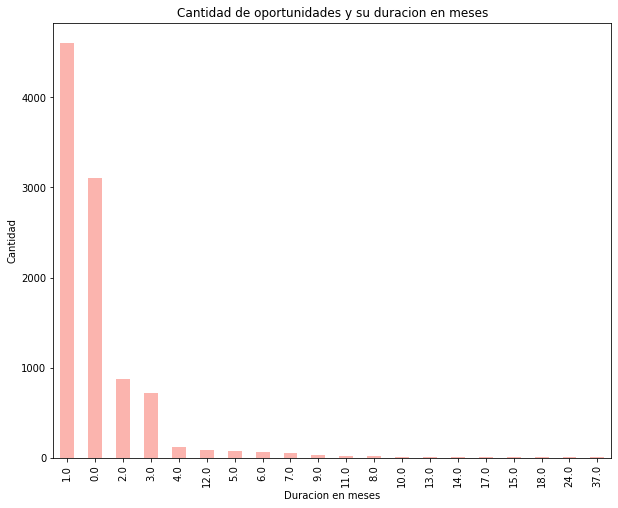

In [41]:
#este grafico no me gusta, debe haber algo mejor para representar esto
df_duracion_grouped['Opportunity_duration_months'].value_counts()\
    .plot.bar(colormap='Pastel1', title='Cantidad de oportunidades y su duracion en meses',figsize=(10,8))

plt.ylabel('Cantidad')
plt.xlabel('Duracion en meses')

plt.show()

In [42]:
df_duracion_grouped_territorio= df_duracion_grouped.groupby('Territory').agg({'Opportunity_duration_months':['mean','count']})
df_duracion_grouped_territorio=df_duracion_grouped_territorio.loc[df_duracion_grouped_territorio[('Opportunity_duration_months','count')]>100,:].reset_index()
df_duracion_grouped_territorio.columns=['Territory','Duration_months_mean','Duration_months_count']
df_duracion_grouped_territorio
#dibujar en mapa cuando me funcione geopandas

,Territory,Duration_months_mean,Duration_months_count
0,Australia,1.65,565
1,Belgium,0.96,179
2,Central US,1.10,145
3,France,1.19,393
4,Germany,1.49,1072
5,India,1.32,674
6,Indonesia,0.82,141
7,Italy,1.05,206
8,Japan,0.30,605
9,NE America,1.31,517


In [22]:
#capaz los valores se ven mejor en dias para hacer el mapa
df_duracion_grouped['Opportunity_duration']= pd.to_numeric(df_duracion_grouped['Opportunity_duration'].dt.days, downcast='integer')
df_duracion_grouped_territorio2= df_duracion_grouped.groupby('Territory').agg({'Opportunity_duration':['mean','count']})
df_duracion_grouped_territorio2=df_duracion_grouped_territorio2.loc[df_duracion_grouped_territorio2[('Opportunity_duration','count')]>100,:].reset_index()
df_duracion_grouped_territorio2.columns=['Territory','Duration_mean','Duration_count']
df_duracion_grouped_territorio2

,Territory,Duration_mean,Duration_count
0,Australia,34.71,565
1,Belgium,20.18,179
2,Central US,18.32,145
3,France,27.10,393
4,Germany,30.00,1072
5,India,28.14,674
6,Indonesia,12.74,141
7,Italy,10.24,206
8,Japan,6.37,605
9,NE America,31.14,517


In [23]:
#oportunidades y su codigo de aprobacion
df[['Opportunity_ID','Bureaucratic_Code_0_Approval','Bureaucratic_Code_0_Approved','Submitted_for_Approval','Bureaucratic_Code','Stage']].head(3)

,Opportunity_ID,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Stage
0,0,1,1,0,Bureaucratic_Code_4,Closed Lost
1,1,0,0,0,Bureaucratic_Code_4,Closed Won
2,2,0,0,0,Bureaucratic_Code_4,Closed Won


In [24]:
bureauctratic_codes= df.groupby(['Bureaucratic_Code_0_Approval','Bureaucratic_Code_0_Approved'])['Stage'].value_counts().to_frame()
bureauctratic_codes = bureauctratic_codes.unstack()
bureauctratic_codes.columns= ['Closed Lost','Closed Won','Negotiation', 'Proposal','Qualification']
bureauctratic_codes = bureauctratic_codes.reset_index()
bureauctratic_codes = bureauctratic_codes.fillna(0)
#0 si no se necesito ni aprobo
#1 si se necesito y aprobo
#2 si se necesito y no se aprobo
conditions = [
    ((bureauctratic_codes['Bureaucratic_Code_0_Approval']) == 0 & (bureauctratic_codes['Bureaucratic_Code_0_Approved'] == 0)),
    ((bureauctratic_codes['Bureaucratic_Code_0_Approval']) == 1 & (bureauctratic_codes['Bureaucratic_Code_0_Approved'] == 0)),
    ((bureauctratic_codes['Bureaucratic_Code_0_Approval']) == 1 & (bureauctratic_codes['Bureaucratic_Code_0_Approved'] == 1)),
    ]

# create a list of the values we want to assign for each condition
values = [0, 1, 2]

# create a new column and use np.select to assign values to it using our lists as arguments
bureauctratic_codes['Bureauctratic_code'] = np.select(conditions, values)
bureauctratic_codes['Total_opportunities'] =  bureauctratic_codes['Closed Lost'] + bureauctratic_codes['Closed Won']\
+ bureauctratic_codes['Negotiation'] + bureauctratic_codes['Proposal'] + bureauctratic_codes['Qualification'] 
bureauctratic_codes

,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Closed Lost,Closed Won,Negotiation,Proposal,Qualification,Bureauctratic_code,Total_opportunities
0,0,0,"2,961.00","5,928.00",0.00,0.00,0.00,0,"8,889.00"
1,1,0,"1,846.00",787.00,1.00,9.00,11.00,1,"2,654.00"
2,1,1,"2,543.00","2,818.00",17.00,26.00,0.00,2,"5,404.00"


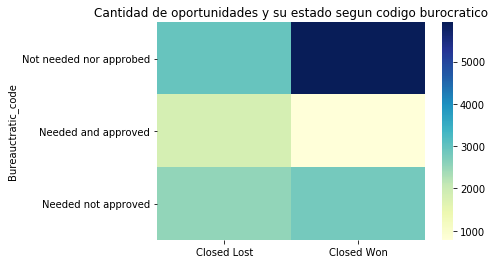

In [25]:
heatmap_data = bureauctratic_codes.set_index('Bureauctratic_code').loc[:,['Closed Lost','Closed Won']]
x_axis_labels = ['Closed Lost','Closed Won'] 
y_axis_labels = ['Not needed nor approbed','Needed and approved','Needed not approved'] 
ax = plt.axes()
sns.heatmap(heatmap_data, xticklabels=x_axis_labels, yticklabels=y_axis_labels,cmap="YlGnBu", ax = ax)
ax.set_title('Cantidad de oportunidades y su estado segun codigo burocratico')
plt.show()

In [58]:
#vendedores y sus oporntunidades
vendedores = df.groupby('Account_Owner')['Stage'].value_counts().to_frame()
vendedores =vendedores.unstack()
vendedores.columns = ['Closed Lost','Closed Won','Negotiation','Proposal','Qualification']
vendedores =vendedores.fillna(0)

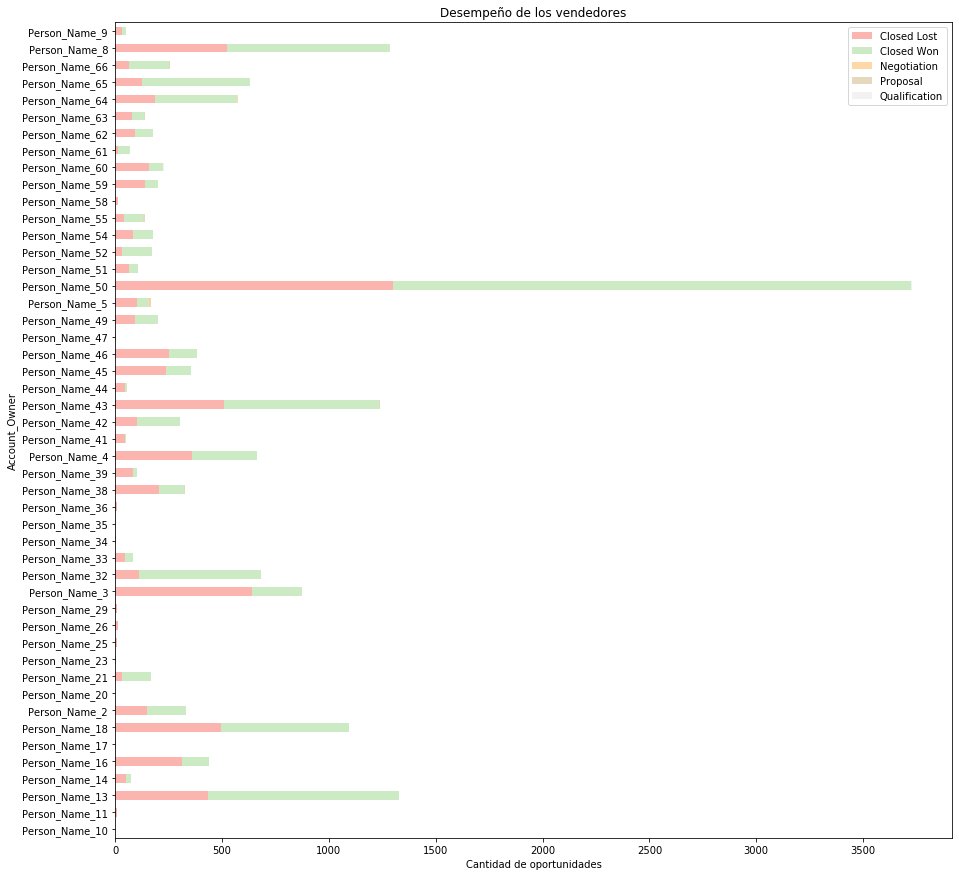

In [59]:
#vendedores, cuantas oportunidades cerraron, perdieron,...
#el vendedor 50 tiene demasiadosss y no deja que se vea bien el resto mejor hago top 10
ax = vendedores.plot.barh(stacked = True, colormap='Pastel1', title='Desempeño de los vendedores',figsize =(15,15))
ax.set_xlabel('Cantidad de oportunidades')

plt.show()

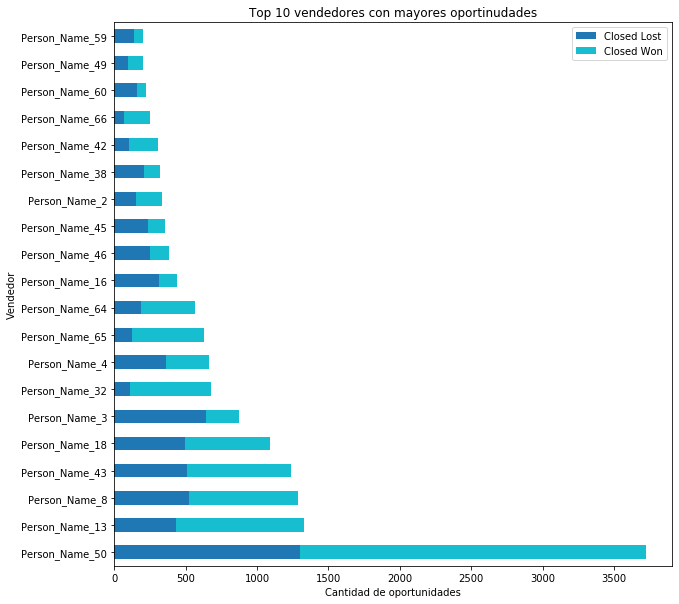

In [61]:
vendedores['Cantidad'] = vendedores['Closed Lost'] + vendedores['Closed Won'] + vendedores['Negotiation'] + vendedores['Proposal'] + vendedores['Qualification']
vendedores_top_10 = vendedores.nlargest(20,'Cantidad')
#vendedores_top_10[['Closed Lost','Closed Won','Negotiation','Proposal','Qualification']].plot.barh(stacked = True, colormap='Pastel1', title='Vendedores con mayores oportunidades', figsize=(10,10))
ax = vendedores_top_10[['Closed Lost','Closed Won']].plot.barh(stacked = True, colormap='tab10', title='Top 10 vendedores con mayores oportinudades', figsize=(10,10))
ax.set_ylabel('Vendedor')
ax.set_xlabel('Cantidad de oportunidades')
plt.show()

In [29]:
#vendedores normalizado y sus oporntunidades
vendedores2 = df.groupby('Account_Owner')['Stage'].value_counts(normalize = True).to_frame()
vendedores2 =vendedores2.unstack()
vendedores2.columns = ['Closed Lost','Closed Won','Negotiation','Proposal','Qualification']
vendedores2 =vendedores2.fillna(0)

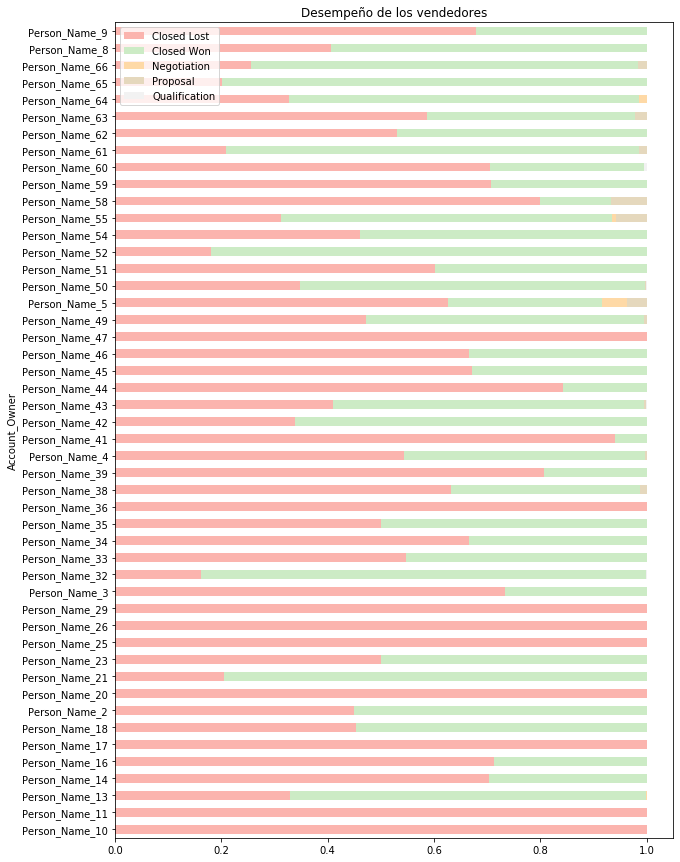

In [30]:
#vendedores normalizado, cuantas oportunidades cerraron, perdieron,...
vendedores2.plot.barh(stacked = True, colormap='Pastel1', title='Desempeño de los vendedores',figsize =(10,15))

In [31]:
#vendedores y el valor recaudado por cada uno de ellos
vendedores_total_facturado = df.loc[df['Stage'] == 'Closed Won']
vendedores_total_facturado = vendedores_total_facturado.groupby('Account_Owner')\
    .agg({'Total_Amount': 'sum','Total_Taxable_Amount':'sum', 'Total_Taxable_Amount_(converted)': 'sum','Total_Amount_(converted)': 'sum'})
vendedores_total_facturado.head(3)

,Total_Amount,Total_Taxable_Amount,Total_Taxable_Amount_(converted),Total_Amount_(converted)
Account_Owner,,,,
Person_Name_13,"212,784,644.34","599,170,767.87","663,556,158.60","236,429,633.31"
Person_Name_14,"2,567,951.95","2,662,031.95","3,011,014.10","2,904,600.57"
Person_Name_16,"27,043,330.80","31,988,310.28","36,181,854.73","30,588,607.46"


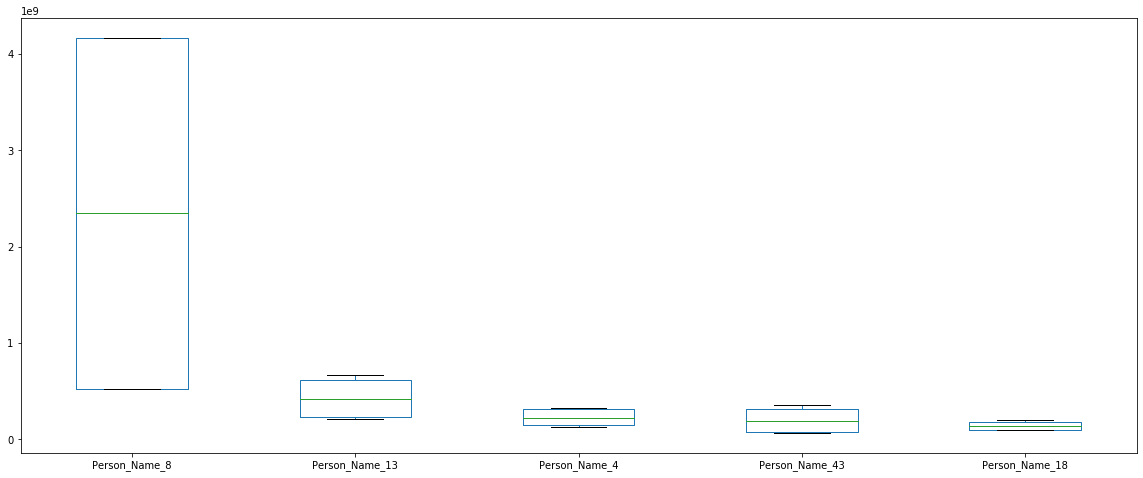

In [32]:
vendedores_total_facturado.nlargest(5,['Total_Taxable_Amount_(converted)']).transpose().plot.box(figsize=(20,8))

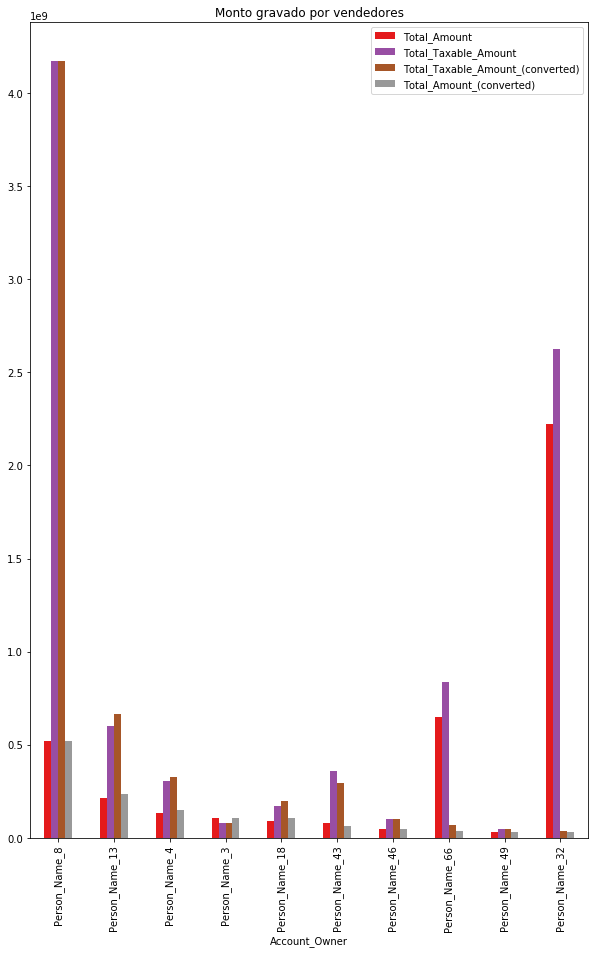

In [33]:
vendedores_total_facturado.nlargest(10,['Total_Amount_(converted)','Total_Taxable_Amount_(converted)']).plot.bar(colormap='Set1', title='Monto gravado por vendedores',figsize =(10,15))

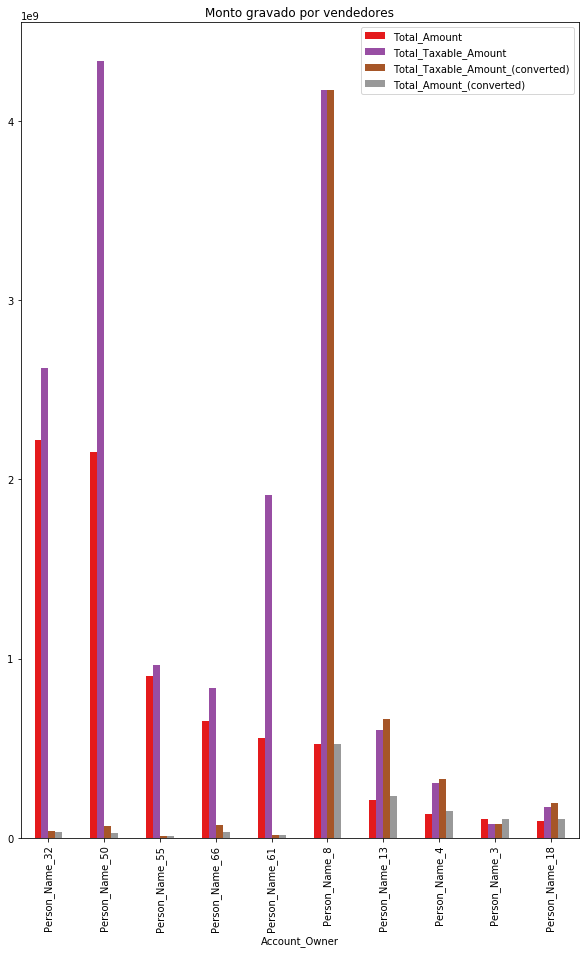

In [34]:
vendedores_total_facturado.nlargest(10,['Total_Amount','Total_Taxable_Amount']).plot.bar(colormap='Set1', title='Monto gravado por vendedores',figsize =(10,15))